In [1]:
import numpy as np
print(np.__version__)

1.26.4


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example binary classification outcomes
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]  # Actual labels
y_pred = [0, 1, 0, 0, 1, 0, 1, 1, 0, 0]  # Predicted labels by the model

In [4]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [8]:
precision = precision_score(y_true, y_pred)
print(f"Recall: {precision:.2f}")

Recall: 0.75


In [9]:
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.60


In [10]:
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.67


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example binary classification outcomes
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]  # Actual labels
y_pred = [0, 1, 0, 0, 1, 0, 1, 1, 0, 0]  # Predicted labels by the model

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.70
Precision: 0.75
Recall: 0.60
F1 Score: 0.67


In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print (cm)

[[4 1]
 [2 3]]


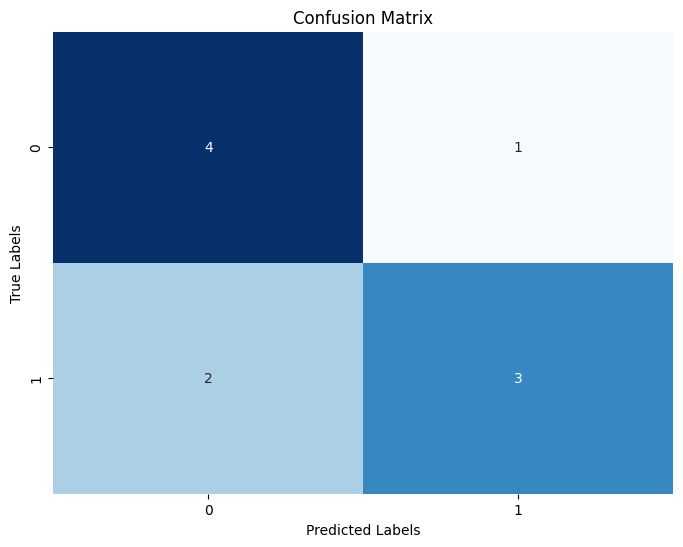

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6)) 
plt.tight_layout()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)  # "d" for decimal format
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Generating larger example data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Reshape X to be a 2D array
X = X.reshape(-1, 1)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Calculating MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r_squared}")

Mean Squared Error: 0.245222733362597
R-Squared: 0.6280065468471038


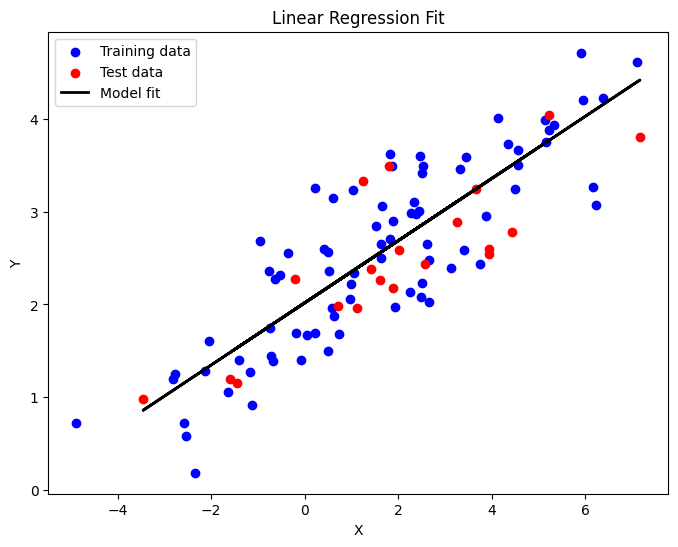

In [12]:
# Plot outputs
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6)) 
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Model fit')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

Underfitting Example: Linear Model - Training MSE: 0.230, Test MSE: 0.318
Overfitting Example: High-Degree Polynomial - Training MSE: 0.064, Test MSE: 0.244


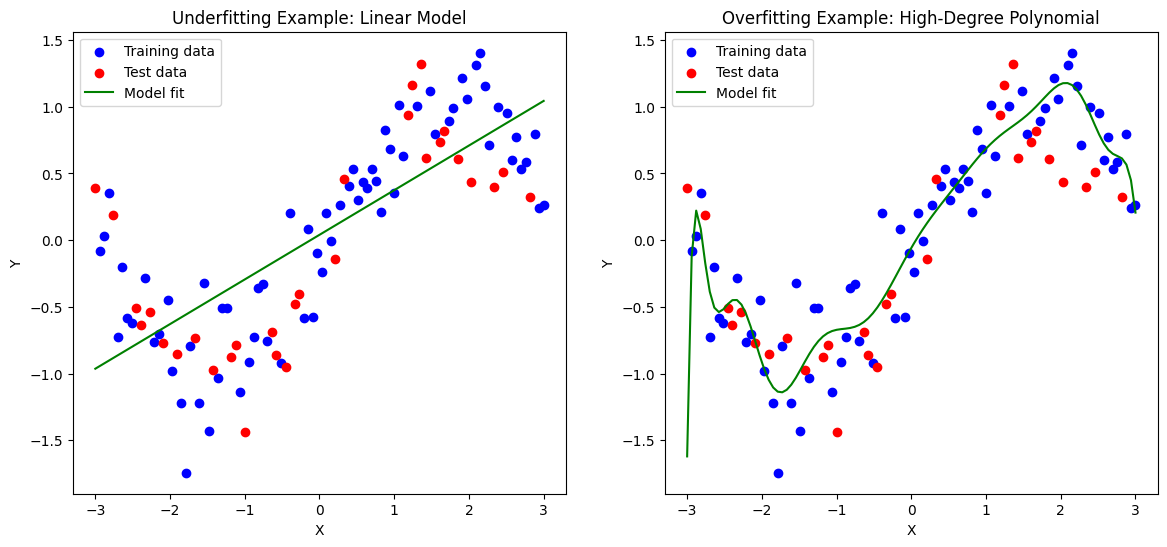

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = np.sin(x) + np.random.normal(size=x.shape) * 0.3
x = x[:, np.newaxis]

# Splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Function to create a model, plot it, and calculate MSE
def plot_model(degree, x_train, x_test, y_train, y_test, ax, title):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Plotting
    ax.scatter(x_train, y_train, color='blue', label='Training data')
    ax.scatter(x_test, y_test, color='red', label='Test data')
    # Sorting x for line plot
    x_line = np.vstack([x_train, x_test])
    y_line = model.predict(x_line)
    sorted_indexes = np.argsort(x_line.flatten())
    ax.plot(x_line[sorted_indexes].flatten(), y_line[sorted_indexes], color='green', label='Model fit')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

    # Compute MSE for training and testing sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f'{title} - Training MSE: {mse_train:.3f}, Test MSE: {mse_test:.3f}')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Underfitting example with a low degree polynomial
plot_model(1, x_train, x_test, y_train, y_test, axs[0], 'Underfitting Example: Linear Model')

# Overfitting example with a high degree polynomial
plot_model(15, x_train, x_test, y_train, y_test, axs[1], 'Overfitting Example: High-Degree Polynomial')

plt.show()

In [15]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

# Define the k-fold cross-validator (k=5)
kf = KFold(n_splits=5, random_state=None, shuffle=True)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)

print("Scores from each Iteration: ", scores)
print("Average K-Fold Score :", np.mean(scores))

Scores from each Iteration:  [0.93333333 0.9        0.96666667 0.93333333 0.96666667]
Average K-Fold Score : 0.9400000000000001


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X, y = data.data, data.target

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X, y)
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import scipy.stats as stats

# Load data
data = load_iris()
X, y = data.data, data.target

# Hyperparameter distribution
param_dist = {
    'n_estimators': stats.randint(10, 200),
    'max_features': ['sqrt', 'log2'],
    'max_depth': stats.randint(3, 10)
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_dist,
                                   n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
random_search.fit(X, y)
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 102}


In [25]:
# Predicting on training data
y_train_pred_grid = grid_search.predict(X)
y_train_pred_random = random_search.predict(X)

# Evaluating accuracy
accuracy_grid = accuracy_score(y, y_train_pred_grid)
accuracy_random = accuracy_score(y, y_train_pred_random)

print(f"Training Accuracy from Grid Search: {accuracy_grid}")
print(f"Training Accuracy from Random Search: {accuracy_random}")

Training Accuracy from Grid Search: 0.9866666666666667
Training Accuracy from Random Search: 1.0
